# Communicate Data Findings 
## Loan Data From Prosper


### Preliminary Wrangling

This dataset contains 113,917 records of loans. Each record includes information such as Borrower APR, Borrowed amount, Debt, Occupation, etc. This analysis explores the factors that influence the Borrower APR. 



In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [38]:
df = pd.read_csv('prosperLoanData.csv')

In [39]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [41]:
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 
        'ProsperRating (Alpha)', 'ProsperScore','EmploymentStatus']
df_sub = df[cols]

In [42]:
df_sub.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),ProsperScore,EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,7.0,Employed
2,3001,0.28269,2083.333333,36,NaN,NaN,Not available
3,10000,0.12528,2875.000000,36,A,9.0,Employed
4,15000,0.24614,9583.333333,36,D,4.0,Employed


In [43]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113937 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   StatedMonthlyIncome    113937 non-null  float64
 3   Term                   113937 non-null  int64  
 4   ProsperRating (Alpha)  84853 non-null   object 
 5   ProsperScore           84853 non-null   float64
 6   EmploymentStatus       111682 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 6.1+ MB


In [44]:
df_sub = df_sub[~df_sub.BorrowerAPR.isna()]

In [45]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113912 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   StatedMonthlyIncome    113912 non-null  float64
 3   Term                   113912 non-null  int64  
 4   ProsperRating (Alpha)  84853 non-null   object 
 5   ProsperScore           84853 non-null   float64
 6   EmploymentStatus       111682 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 7.0+ MB


### What is the structure of your dataset?

The original dataset consisted of 113,937 records based on 81 features. The dataset after performing some data wrangling consists of 113,912 record and 7 features which are explored futher in the future sections.

### What is/are the main feature(s) of interest in your dataset?
The main feature of interest in this analysis is going to be Borrower APR and the various factors that impact its value. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I believe features like the Loan amount, Income of the borrower, Employement status, Loan term  can impact the Prosper score which in turn impacts the APR.  

### Univariate Exploration

Let's start by looking at the distribution of the main variable of interest - Borrower APR

#### Variable of Interest - Borrower API

In [46]:
df_sub['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

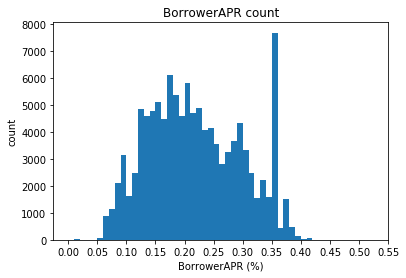

In [47]:
bins = np.arange(0, df_sub['BorrowerAPR'].max(), 0.01)
plt.hist(data = df_sub, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_sub['BorrowerAPR'].max()+0.05, 0.05));

With more than one peak, the APR distribution is a multimodal distribution. It has a small peak centered around 0.08, a large peak at around 0.18, followed by another small peak at 0.29, an exceptionally high peak an 0.35, and another small peak at 0.37 APR rates.

#### Predictor Variable 1 - Original Loan Amount

In [48]:
df_sub['LoanOriginalAmount'].describe()

count    113912.000000
mean       8338.015661
std        6245.940592
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

Text(0, 0.5, 'Count')

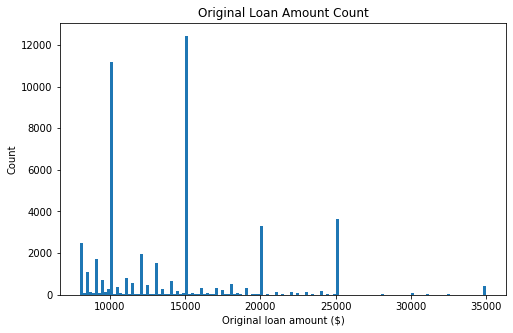

In [49]:
bins = np.arange(8000, df_sub.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = df_sub, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.title('Original Loan Amount Count')
plt.ylabel('Count')


From the above graph we can see that most loans are for the amounts of 15k and 10k followed by 20k and 25k. A very small number of loans are only as high as 35k. 

#### Predictor Variable 2 - Monthly Income

In [50]:
df_sub['StatedMonthlyIncome'].max()

1750002.916667

Text(0, 0.5, 'Count')

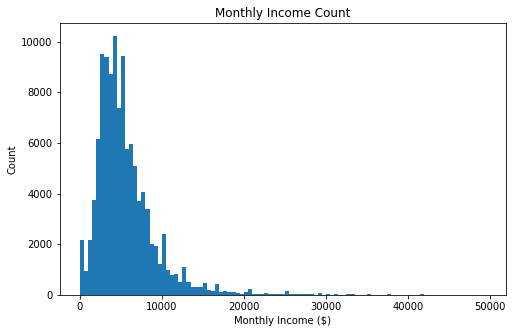

In [51]:
bins = np.arange(0,50000,500)
plt.figure(figsize=[8, 5])
plt.hist(data = df_sub, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Monthly Income ($)');
plt.title('Monthly Income Count')
plt.ylabel('Count')

The distribution for monthly income is extremely right skewed indicating that most borrower's have monthly income less than 20k.
Records with monthly income of over $30k can be considered outliers and can be eliminated from the dataset.

In [52]:
df_sub[df_sub['StatedMonthlyIncome']>30000].count()

LoanOriginalAmount       327
BorrowerAPR              327
StatedMonthlyIncome      327
Term                     327
ProsperRating (Alpha)    249
ProsperScore             249
EmploymentStatus         318
dtype: int64

In [53]:
#Eliminating records with Income > $30,000

df_sub = df_sub[df_sub['StatedMonthlyIncome']<30000]

#### Predictor Variable 3 - Prosper Score

In [54]:
df_sub['ProsperScore'].describe()

count    84587.000000
mean         5.947486
std          2.375316
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

Text(0.5, 0, 'ProsperScore')

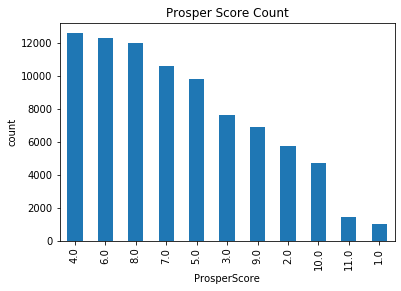

In [55]:
df_sub['ProsperScore'].value_counts().plot(kind='bar')
plt.title('Prosper Score Count')
plt.ylabel('count')
plt.xlabel('ProsperScore')


The average prosper score is 5.9. Most borrowers have prosper scores of 4,5,6,7,8, with maximum count at a score of 4. Very few borrowers have Prosper Scores of 1 and 11, which are two extreme scores.

#### Predictor Variable 4 - Employment Status

In [56]:
df_sub['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

Text(0.5, 0, 'Employment Type')

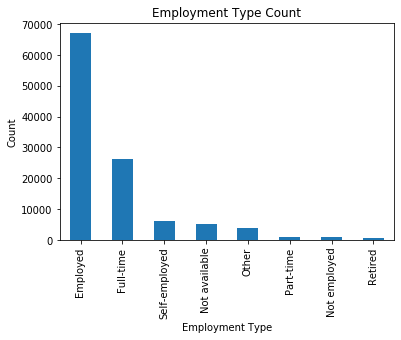

In [57]:
df_sub['EmploymentStatus'].value_counts().plot(kind='bar')
plt.title('Employment Type Count')
plt.ylabel('Count')
plt.xlabel('Employment Type')

Most borrowers are Employed, Full-time or Self-employed. 

#### Predictor Variable 5 - Term

In [58]:
df_sub['Term'].unique()

array([36, 60, 12], dtype=int64)

Text(0.5, 0, 'Term (months)')

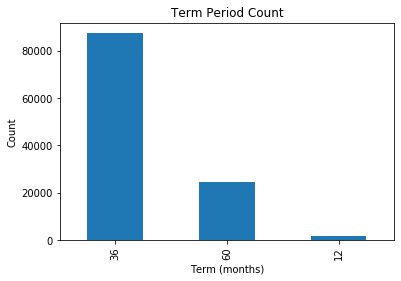

In [59]:
df_sub['Term'].value_counts().plot(kind='bar')
plt.title('Term Period Count')
plt.ylabel('Count')
plt.xlabel("Term (months)")

Most loan periods are for a term of 36 months, followed by 60 months. Very few loans are for a 12 month period.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Borrower APR had a multimodal distribution with almost all values between 0.05 and 0.40. No unusual points were found and no transformation was required.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The predictor variable 'monthly income' was extremely right skewed. A high majority of borrowers fell within an income range of upto 10k per month. A reasonable amount were within an income range of 10k - 20k. A very small percent were between an income range of 20k-30k. Those that were over 30k was a very negligible number, less than 0.3 percent of borrowers, and hence the data was wrangled to eliminate borrowers earning over 30k. 
No transformations are required.


### Bivariate Exploration

We will start off by understanding the pairwise correlations present between all the numeric variables.

In [60]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113562 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113562 non-null  int64  
 1   BorrowerAPR            113562 non-null  float64
 2   StatedMonthlyIncome    113562 non-null  float64
 3   Term                   113562 non-null  int64  
 4   ProsperRating (Alpha)  84587 non-null   object 
 5   ProsperScore           84587 non-null   float64
 6   EmploymentStatus       111342 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 6.9+ MB


In [61]:
variables = ['LoanOriginalAmount', 'BorrowerAPR', 
             'StatedMonthlyIncome', 'Term', 'ProsperScore']

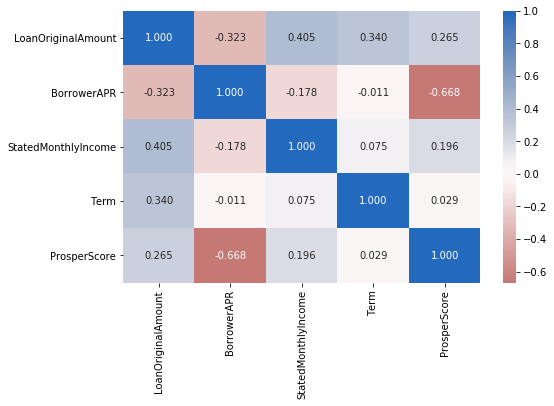

In [62]:
plt.figure(figsize = [8, 5])
sb.heatmap(df_sub[variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

No strong correlation is observed between any two factors. There is a negative correlation between Borrower APR & Loan Amount, Borrower APR & Income, Borrower APR & Prosper Score, Borrower APR & Term.

This is quite self-explainable since APR is the cost of taking a loan. For trustworthy clients with a strong credit background who are eligible to take bigger loans for a longer Term, have better income standing and a good Prosper Score and will pay a lesser APR. 

Clients without an overall strong credit standing, lesser income, smaller loans for shorter terms will end up paying a higher APR. 

Next, lets see the scatter plots for the above correlations.

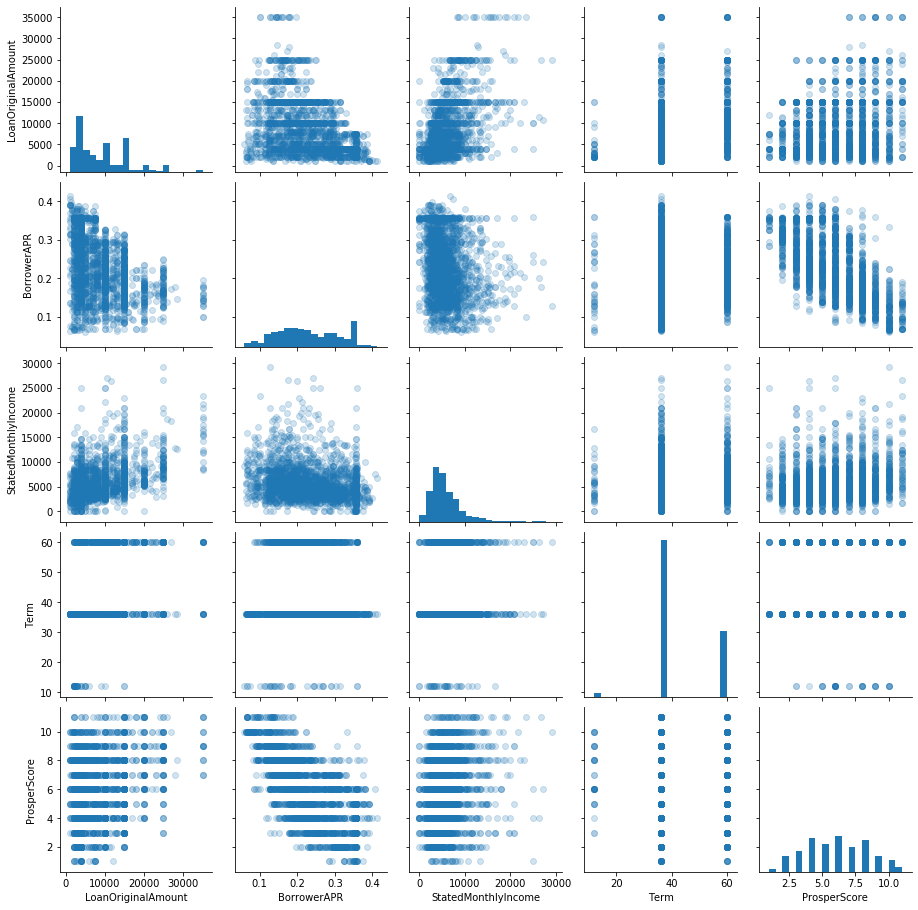

In [63]:
# We will take a sample of 3000 loans to see the pattern clearer.

df_samp = df_sub.sample(3000)
g = sb.PairGrid(data=df_samp.dropna(),vars = variables)
g = g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter,alpha=0.2);


Matrix Plot: 
This is giving us similar results like the correlation chart above. Prosper Score is more inversely related to Borrower APR than any other variable. Monthly income is positively related to Loan amount, which makes sense as higher the income, a bigger loan you are eligible to get. 

Next, lets look more closely into Borrower APR and Prosper Score

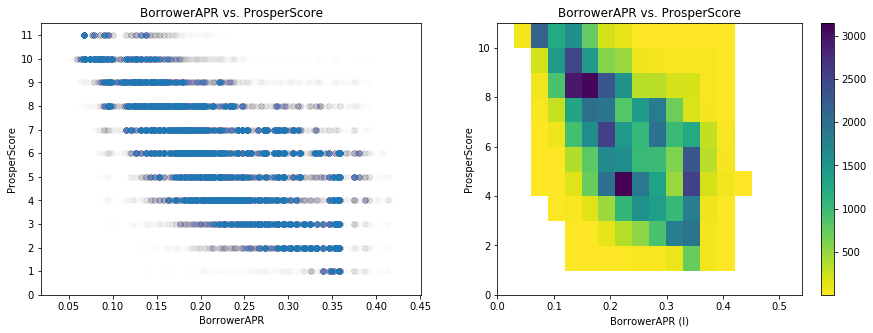

In [64]:
# Heat plot and scatter plot for Borrower APR & Prosper Score

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_sub, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_sub['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_sub['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_sub, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

As explained earlier, this negative correlation is understandable as clients with an overall strong credit standing have a good Prosper Score and are more reliable hence, reducing their cost of loan, which is a reduced APR.

Next, let us look into how APR, Monthly Income and Loan amount correlate with the categorical variable Employment Status.

C:\Users\Svet\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

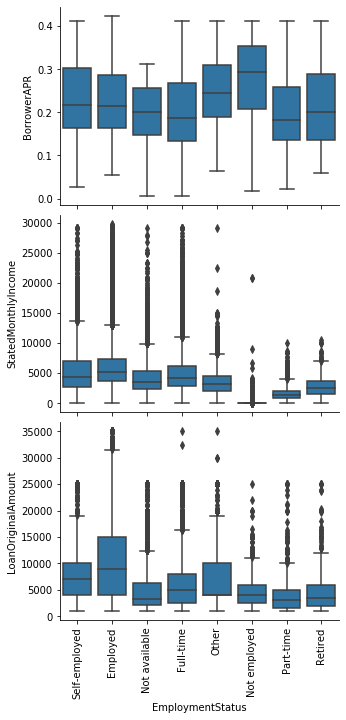

In [65]:
cat_vars = ['EmploymentStatus']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_sub, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cat_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);

From this it is evident that clients that are Employed, Self-employed and Full-time have a higher monthly income and loan amounts, not considering 'Not available' and 'Other' records.
Borrower APR is clearly highest for those who are not employed.

Next, let us look into the relationship between APR and Loan Amount a little deeper.

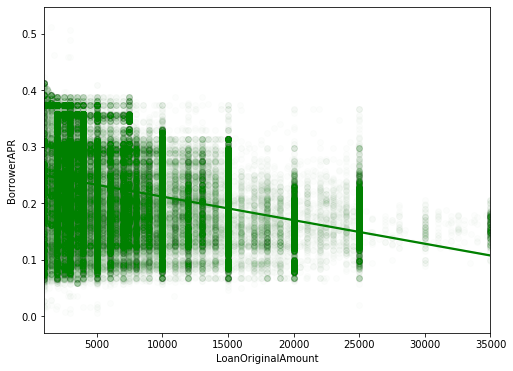

In [66]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01},color = 'green');

From this above graph, we can see that the range across which APR rate varies decreases as the Loan amount increases. Overall, APR rate is negatively correlated with Loan Amount.

Next, lets see the how Monthly Income impacts APR rates a little deeper.

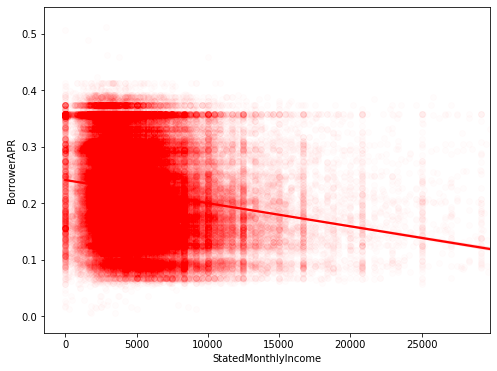

In [67]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_sub, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', scatter_kws={'alpha':0.01},color = 'red');

In [68]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113562 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113562 non-null  int64  
 1   BorrowerAPR            113562 non-null  float64
 2   StatedMonthlyIncome    113562 non-null  float64
 3   Term                   113562 non-null  int64  
 4   ProsperRating (Alpha)  84587 non-null   object 
 5   ProsperScore           84587 non-null   float64
 6   EmploymentStatus       111342 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 6.9+ MB


From the above graph it is obvious that majority of borrowers earn monthly income less than 15,000 dollars. Although the correlation does not seem very strong from the visual above, overall APR is negatively correlated with monthly income.

Finally, lets look into how the categorical variables are related (including Term).

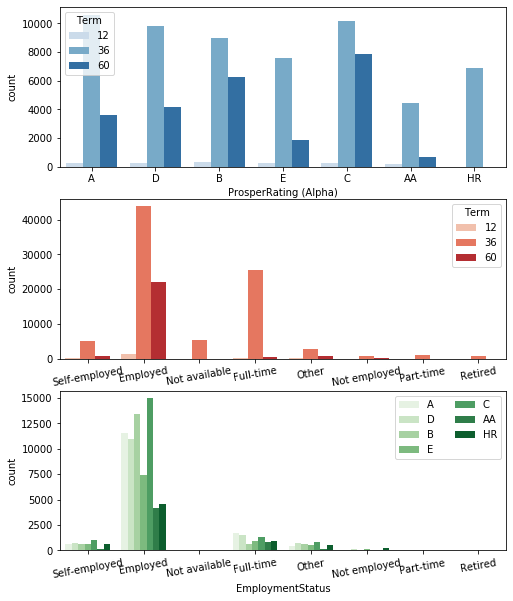

In [69]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = df_sub, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Reds')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_sub, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

When we study Prosper Rating and Term, we can see that for any client rating, most loans are for 36 months, followed by 60 months. A very minimal number of borrowers, irrespective of rating, go for 12 month loan periods. All borrowers with HR rating have taken 36 month loans. 

Looking at Employment Status and Term, we can see that Employed, Self-employed and  Full-Time borrowers mostly also take 36 months loan. 60-month loans are primarily borrowed by Employed borrowers.

When we also add on Prosper Rating and study the graph, we can see that in the Employed category we have clients emanating from across all Prosper Rating with majority having a C or B rating. Unemployed, Part-time and Retired categories do not have sufficient data to make a conclusion on their ratings.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Borrower APR is negatively correlated with Loan Amount, Income and Prosper Score indicating that it decreases for higher income, prosper score and larger loan amount borrowers and is highest for those borrowers who are unemployed.Out of all, Prosper Score has the strongest negative correlation.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Monthly Income and Loan amount is positively correlated. We also see that clients with a better prosper score are those with higher income and loan amounts. Most loan amounts are of 36-month term for borrowers across all Prosper Ratings. Borrowers that do 60-month loan terms primarily have a rating of C. HR rated borrowers only do 36-month loan terms. 

### Multivariate Exploration

C:\Users\Svet\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


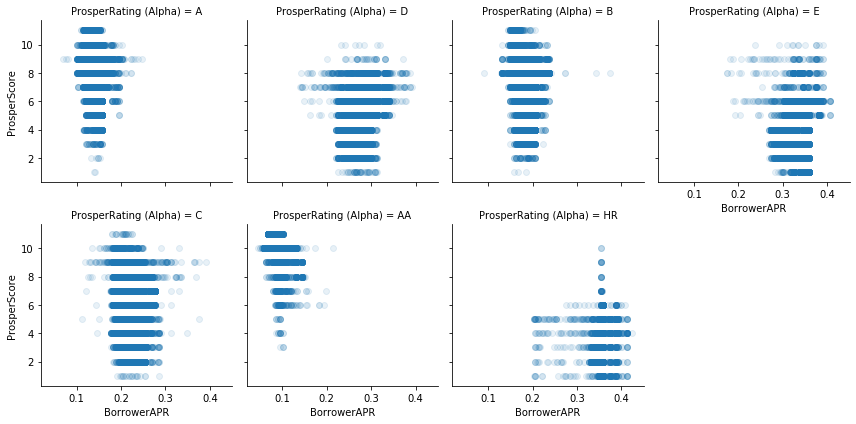

In [70]:

g = sb.FacetGrid(data = df_sub, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

Using this visualization we can see the borrower APR rates for all individual Prosper Ratings and we see that APR is highest amd even crosses 0.4 for HR rated borrowers, follower by E rated borrowers. It is generally lowest for AA rated borrowers, upto a max of 0.2. 

[]

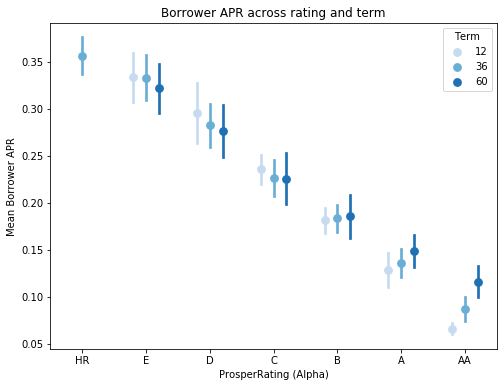

In [71]:

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd',order = ['HR','E','D','C','B','A','AA'])

plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True)


When we add Loan Term into this analysis, an interesting observation can be made. For lower Prosper Ratings, APR rates decrease with longer terms and as the Prosper Ratings get better, APR rates increase with longer terms. Overall, APR decreases with better Prosper Rating.

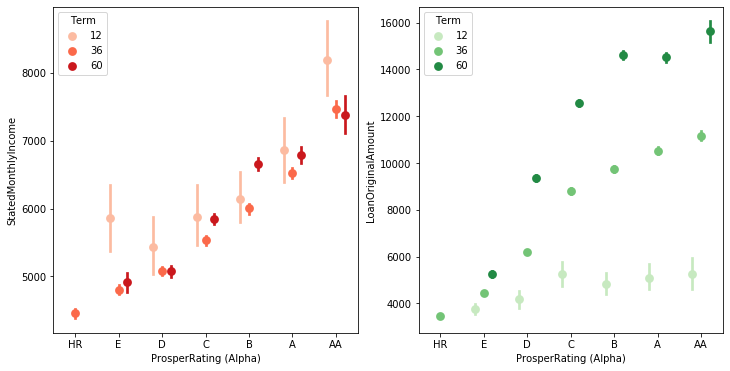

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
    palette = 'Reds', linestyles = '', dodge = 0.4, ax=ax[0], order = ['HR','E','D','C','B','A','AA'])
sb.pointplot(data = df_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
    palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1], order = ['HR','E','D','C','B','A','AA']);

Overall, Monthly Income is seen to be higher for a higher Prosper Rating. For each individual rating, in most cases the highest earning borrowers go for a 12-month term loan.

When looking deeper into Loan amount, we can see that for each individual Prosper Rating, borrowers with the higher loan amounts generally go for a 60-month loan term and those with lower loan terms go with a 12-month loan term. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest? Were there any interesting or surprising interactions between features?

In this section, we first did a deeper analysis on APR Rate for individual Prosper Ratings and then the same but also including different Term Lengths. Mean Borrower APR Rates decreased with better Prosper Score as found earlier, but a pattern was observed with the Term involved. For lower ratings, a shorter term had a higher APR rate. For higher ratings, a longer term had higher APR rates.

When analysing Monthly Income and Loan Amount, they generally have a linear relationship, increases with better Prosper Rating. With adding Term length to the analysis, we could conclude that shorter 12-month term borrowers had a higher income in each rating category and 60-month loan Term borrowers generally took a higher Loan from the bank, for each rating category.

From all the above visualizations, univariate to multivariate explorations, most variables are negatively correlated with Borrower APR with Proser Score and Prosper rating having the strongest negative correlation - Higher and better the Prosper Rating, Lower the Borrower APR Rates.